# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import rdkit as rd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import QED 
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing Data and Data Pre Processing

In [3]:
target = new_client.target
target_query = target.search('coronavirus') #Searching for the required molecule from the Chemble Database
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,5.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859


In [4]:
targets.describe()

,score,tax_id
count,7.000000,7.000000e+00
mean,11.714286,2.934460e+05
std,3.988077,4.721035e+05
min,5.000000,1.111900e+04
25%,9.500000,1.190000e+04
50%,13.000000,2.278590e+05
75%,14.000000,2.278590e+05
max,17.000000,1.335626e+06


## Getting the replicase data

In [7]:
selected_target = 'CHEMBL5118'

In [9]:
activity = new_client.activity
resemble = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50") #Choosing IC50 values

In [18]:
extracted_data = pd.DataFrame.from_dict(resemble)

In [19]:
extracted_data.sample(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
46,None,2702556,[],CHEMBL1055727,Inhibition of ATPase activity of SARS coronavi...,B,BAO_0000190,BAO_0000357,single protein format,N#Cc1cccc(COc2cc(O)c3c(=O)c(O)c(-c4ccc(O)c(O)c...,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,25.4
159,None,13880953,[],CHEMBL3107397,Inhibition of SARS coronavirus 3C-like proteas...,B,BAO_0000190,BAO_0000019,assay format,C(=C/c1ccccc1)\C[N+]1(C/C=C/c2ccccc2)CCN(C(c2c...,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,29.8
204,None,18548170,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)OC1CCN(C(=O)OC(C)(C)C)CC1)C(...,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,5.1
189,None,16602549,[],CHEMBL3811446,Inhibition of SARS coronavirus recombinant 3CL...,B,BAO_0000190,BAO_0000219,cell-based format,O=C(O)c1ccccc1-c1ccc(/C=C2\C(=O)N(c3ccccc3)N=C...,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,41.2
162,None,13880956,[],CHEMBL3107396,Inhibition of SARS coronavirus 3C-like proteas...,B,BAO_0000190,BAO_0000019,assay format,C(=C/c1ccccc1)\C[N+]1(C/C=C/c2ccccc2)CCN(C(c2c...,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,28.3


In [20]:
extracted_data.shape

(215, 43)

In [21]:
extracted_data.describe()

,activity_id,document_year,record_id,src_id
count,2.150000e+02,215.000000,2.150000e+02,215.0
mean,9.727861e+06,2012.251163,1.649424e+06,1.0
std,5.987724e+06,3.025157,7.544374e+05,0.0
min,1.988091e+06,2007.000000,6.631320e+05,1.0
25%,2.886758e+06,2009.000000,8.512515e+05,1.0
50%,1.334092e+07,2013.000000,1.899160e+06,1.0
75%,1.388095e+07,2014.000000,1.960208e+06,1.0
max,1.854818e+07,2018.000000,3.079453e+06,1.0


## Checking whether the type is IC50 or not

In [22]:
extracted_data['type'].unique()

array(['IC50'], dtype=object)

In [23]:
extracted_data.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

## Downloading the replicase data 

In [24]:
extracted_data.to_csv('data.csv', index=False)

In [25]:
filtered_data = extracted_data.where(extracted_data["type"]=="IC50",inplace=None) 

## Function where descriptors are generated and stored as a DataFrame type

In [26]:
def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mole=Chem.MolFromSmiles(elem) 
        moldata.append(mole)
       
    baseData= np.arange(1,1)
    i=0  
    for mole in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mole)
        desc_MolLogP = Descriptors.MolLogP(mole)
        desc_PSA  = rdMolDescriptors.CalcTPSA(mole)
        desc_HBDL = Lipinski.NumHDonors(mole)
        desc_HBAL = Lipinski.NumHAcceptors(mole)
        desc_arorings =  rdMolDescriptors.CalcNumAromaticRings(mole)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mole)
        desc_QED = QED.default(mole)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_PSA,
                        desc_HBDL,
                       desc_HBAL,
                       desc_arorings,
                       desc_NumRotatableBonds,
                        desc_QED
                       ])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["Mol Wt","AlogP","PSA","HBD Lipinski","HBA Lipinski","aromatic rings","num of rotatable bonds","QED"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

## Extracting the smiles and standard value data while dropping the NA values 

In [27]:
raw_data = pd.concat([filtered_data["canonical_smiles"],filtered_data["standard_value"]],axis = 1)
raw_data = raw_data.dropna().reset_index(drop=True)
raw_data.sample(5)

,canonical_smiles,standard_value
212,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0
38,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,50000.0
101,Oc1cc(O)c2oc3cc(O)c4oc5cc(O)cc(O)c5oc4c3oc2c1,158300.0
75,COC(=O)[C@]1(C)CCC[C@]2(C)c3ccc(C(C)C)cc3CC[C@...,207000.0
137,CC1CCN(S(=O)(=O)c2ccc3c(c2)C(=O)C(=O)N3Cc2ccc3...,17820.0


In [28]:
raw_data.describe()

,canonical_smiles,standard_value
count,214,214
unique,170,157
top,Cn1cnc2cc(NC(=O)c3ccc(Cl)cc3)ccc21,50000.0
freq,3,29


In [36]:
X = generate(raw_data["canonical_smiles"])
X.sample(10)

,Mol Wt,AlogP,PSA,HBD Lipinski,HBA Lipinski,aromatic rings,num of rotatable bonds,QED
49,438.819,4.83230,98.36,2.0,7.0,4.0,4.0,0.470397
99,602.460,6.41900,232.13,9.0,14.0,6.0,4.0,0.105794
44,426.808,4.51480,120.36,4.0,7.0,4.0,4.0,0.354027
100,374.301,3.21040,160.07,7.0,9.0,3.0,4.0,0.363594
53,429.384,4.05058,122.15,2.0,8.0,4.0,4.0,0.498201
163,278.352,1.62420,56.51,1.0,5.0,2.0,9.0,0.708257
202,496.605,1.73670,143.14,3.0,7.0,0.0,9.0,0.412600
71,302.458,4.51660,40.46,2.0,2.0,1.0,1.0,0.800642
20,332.739,3.62820,83.83,2.0,4.0,2.0,6.0,0.479198
104,496.380,4.81400,198.76,8.0,12.0,4.0,4.0,0.169035


In [37]:
X.describe()

,Mol Wt,AlogP,PSA,HBD Lipinski,HBA Lipinski,aromatic rings,num of rotatable bonds,QED
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,420.64136,3.219787,107.608645,2.654206,5.738318,2.443925,5.808411,0.478432
std,115.74517,2.510228,63.024152,2.654088,2.873994,1.505588,4.485315,0.238223
min,126.11100,-6.978800,3.240000,0.000000,1.000000,0.000000,0.000000,0.057852
25%,330.83700,1.982975,74.760000,1.000000,4.000000,1.000000,3.000000,0.277486
50%,409.66800,3.448550,85.565000,2.000000,5.000000,2.000000,5.000000,0.479198
75%,494.90125,4.827725,131.360000,3.000000,7.000000,3.000000,7.000000,0.700895
max,742.55400,8.245740,346.740000,11.000000,18.000000,7.000000,21.000000,0.897817


In [38]:
y = raw_data["standard_value"]
y

0      870000.0
1      200000.0
2      300000.0
3       15000.0
4       10000.0
         ...   
209      4300.0
210      5500.0
211      4100.0
212      3200.0
213      8800.0
Name: standard_value, Length: 214, dtype: object

In [39]:
y.describe()

count         214
unique        157
top       50000.0
freq           29
Name: standard_value, dtype: object

In [41]:
regression_data = pd.concat([X,y],axis = 1)

In [42]:
columns_names = ['Mol Wt', 'AlogP', 'PSA', 'HBD Lipinski', 'HBA Lipinski',
       'aromatic rings', 'num of rotatable bonds', 'QED', 'standard_value']

## Normalizing the Final Data

In [43]:
from sklearn import preprocessing
normalized_regression_data = preprocessing.scale(regression_data.values)
normalized_regression_data = pd.DataFrame(normalized_regression_data,columns =columns_names)

In [45]:
normalized_regression_data.describe() #Final form of the Preprocessed Data

,Mol Wt,AlogP,PSA,HBD Lipinski,HBA Lipinski,aromatic rings,num of rotatable bonds,QED,standard_value
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,5.229462e-16,-6.640586e-17,2.324205e-16,8.508251e-17,-1.452628e-16,-1.245110e-16,5.810513e-17,4.980440e-17,-1.660147e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.550611e+00,-4.072338e+00,-1.659893e+00,-1.002389e+00,-1.652553e+00,-1.627043e+00,-1.298020e+00,-1.769626e+00,-5.707369e-01
25%,-7.776992e-01,-4.938640e-01,-5.224293e-01,-6.247284e-01,-6.062621e-01,-9.612930e-01,-6.276027e-01,-8.454961e-01,-4.800054e-01
50%,-9.502849e-02,9.134617e-02,-3.505851e-01,-2.470677e-01,-2.574984e-01,-2.955432e-01,-1.806577e-01,3.222962e-03,-2.765342e-01
75%,6.430852e-01,6.420565e-01,3.777448e-01,1.305929e-01,4.400290e-01,3.702067e-01,2.662874e-01,9.360336e-01,-5.333889e-02
max,2.787740e+00,2.006884e+00,3.803178e+00,3.151878e+00,4.276430e+00,3.033206e+00,3.394903e+00,1.764601e+00,8.459228e+00


## Some plots about the Regression Data

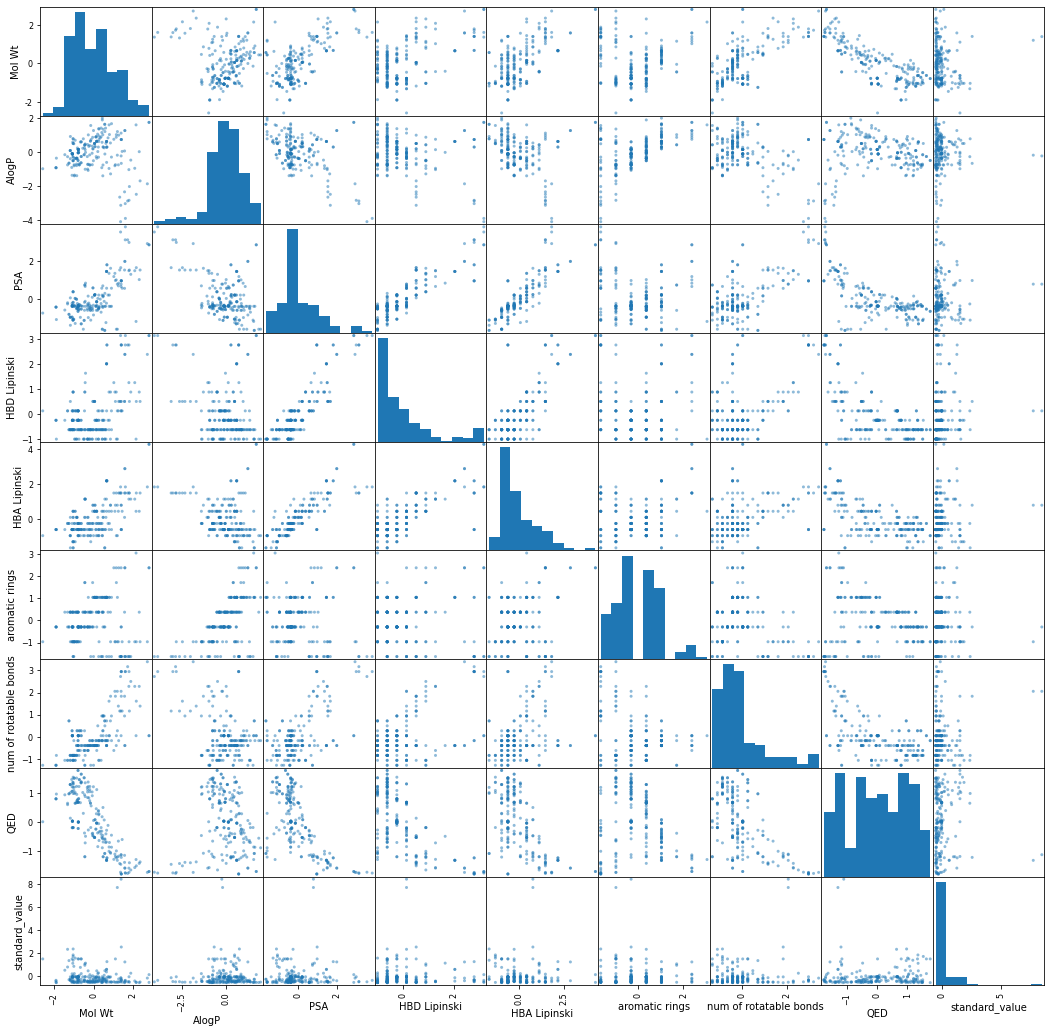

In [47]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
scatter_matrix(normalized_regression_data,figsize=(18,18))
plt.show()

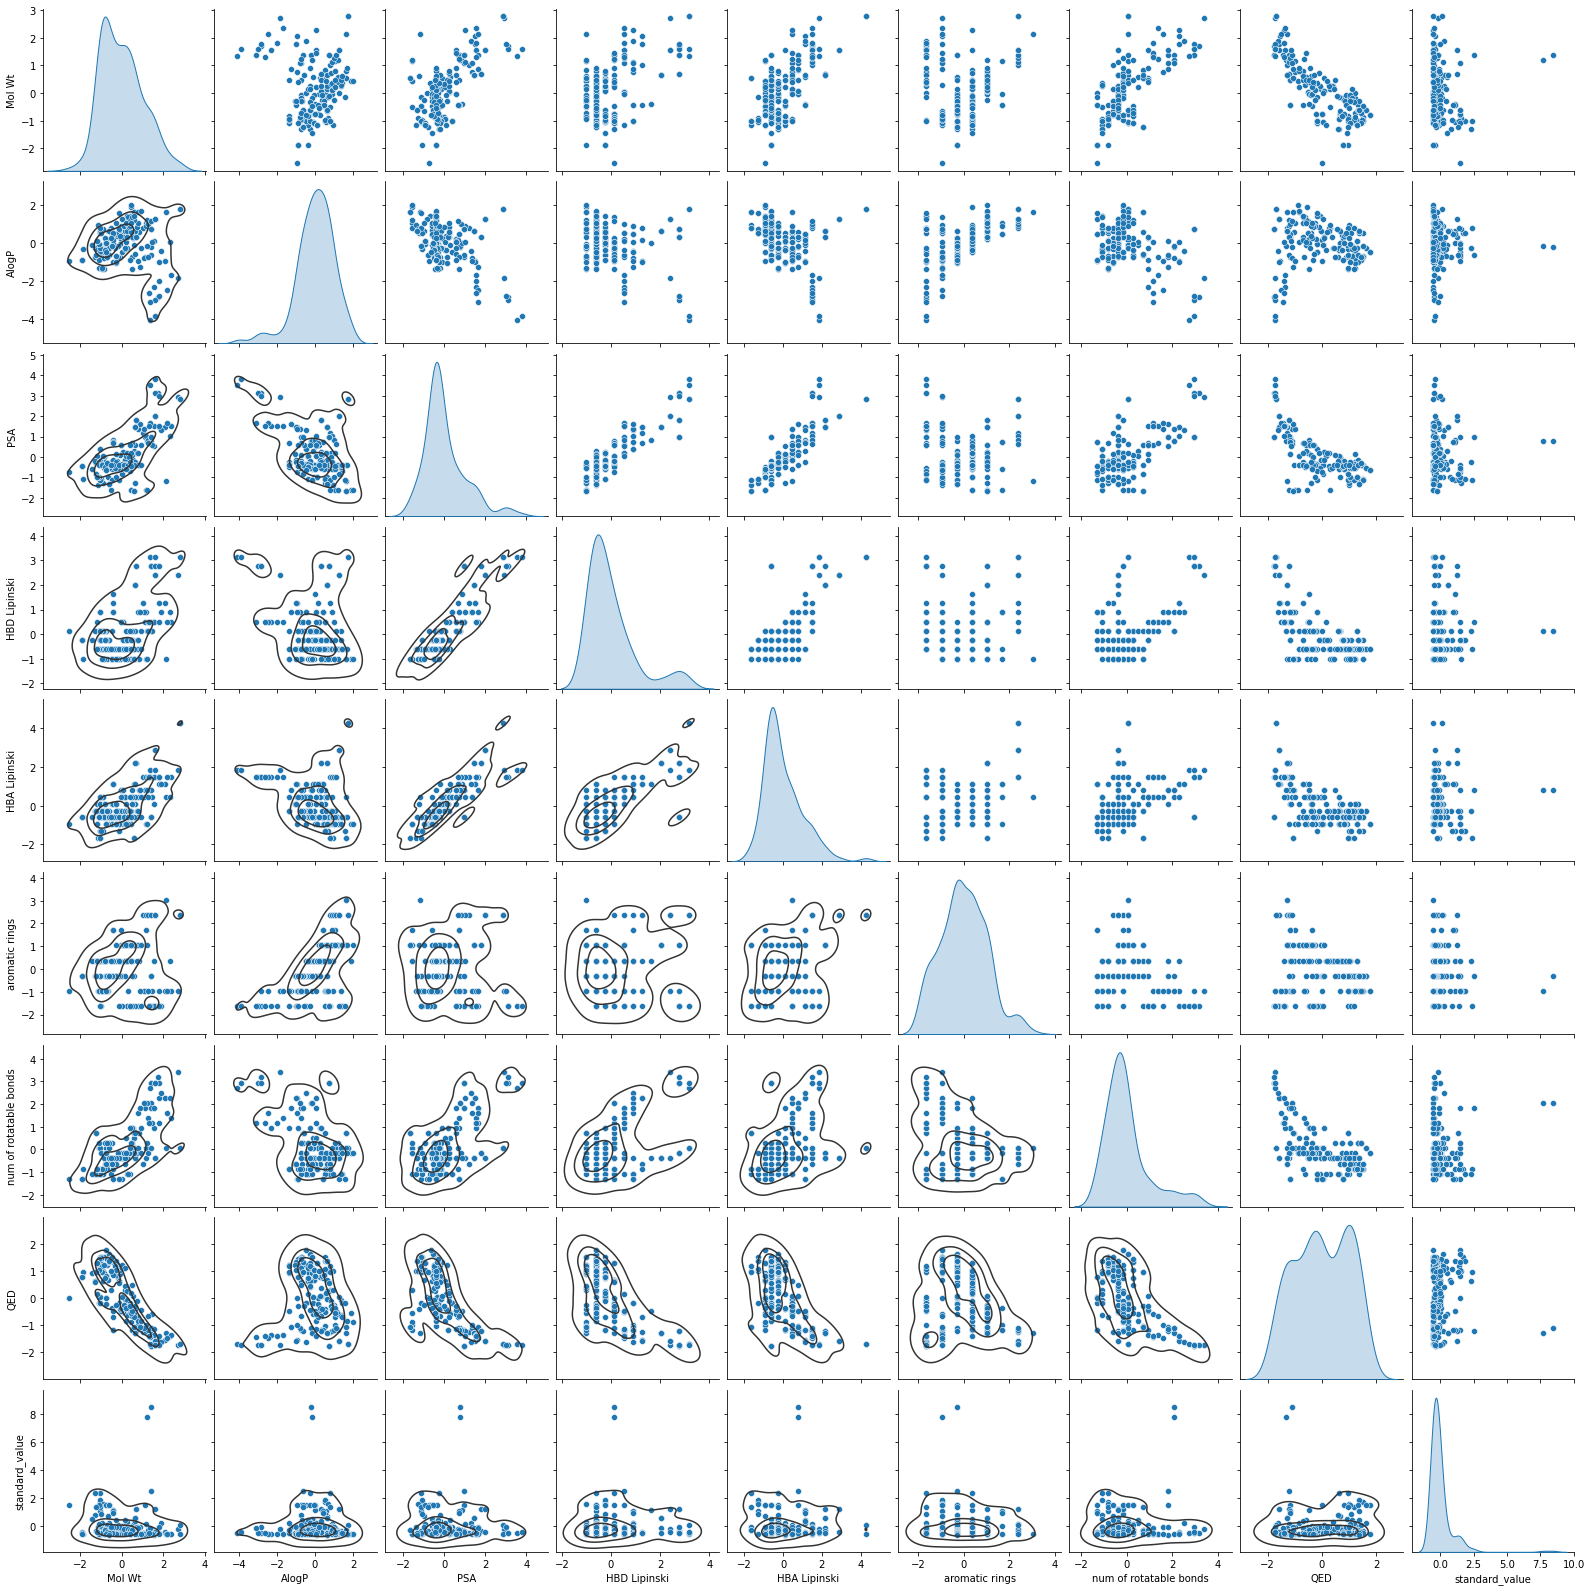

In [48]:
g = sns.pairplot(normalized_regression_data, diag_kind="kde") #trying to find a Correlation
g.map_lower(sns.kdeplot, levels=4, color=".2") #Plotting 1v1 for all the columns, with different correlations

Mol Wt


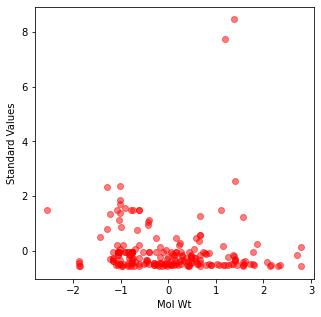

AlogP


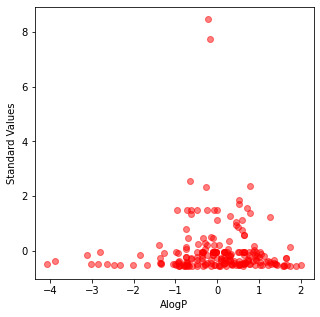

PSA


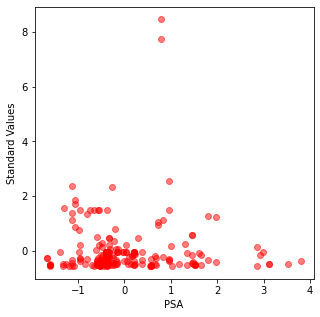

HBD Lipinski


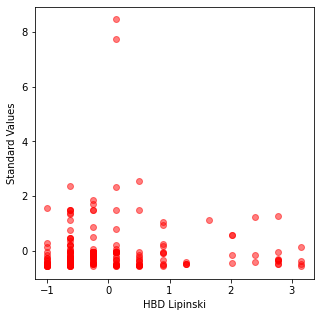

HBA Lipinski


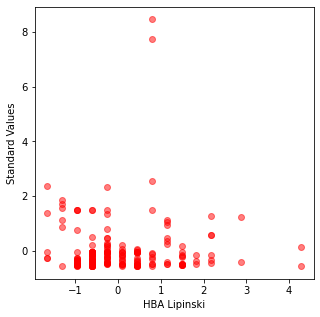

aromatic rings


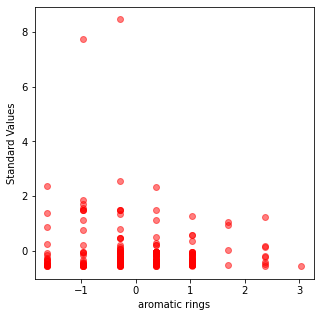

num of rotatable bonds


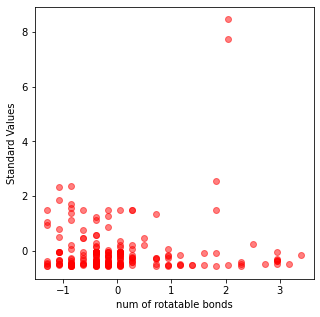

QED


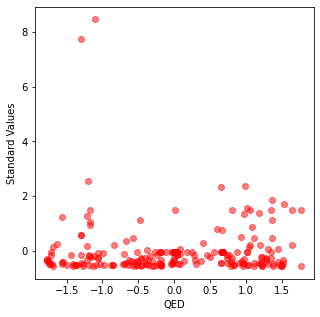

In [49]:
for i in columns_names[:8]:
    print(i)
    plt.figure(figsize=(5,5))
    plt.scatter(normalized_regression_data[i],normalized_regression_data.standard_value,marker='o',color='red',alpha = 0.5)
    plt.ylabel('Standard Values')
    plt.xlabel(i)
    plt.show()

# Model and Inference

## Linear Regression

In [59]:
from sklearn.model_selection import train_test_split #Defining a Function
from sklearn import datasets, linear_model           #It will loop over and calculte the score for various random values 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
def do_test1(data,test,r):
    inp = data.drop("standard_value",axis=1).values
    out = np.array(data["standard_value"])
    train_features, test_features, train_labels, test_labels = train_test_split(
        inp, out, test_size = test ,random_state = r)
    lr =LinearRegression()
    lr.fit(train_features, train_labels)
    return lr.score(test_features,test_labels)

In [60]:
for r in range(100):
    if do_test1(normalized_regression_data,0.15,r)>0.1:
        print(r,do_test1(normalized_regression_data,0.15,r))

12 0.10404838667006377
23 0.16047463286852393
40 0.1704507529162561


### Plotting the R2 values against various random states

In [61]:
l = []
for z in range(100):
    t = do_test1(normalized_regression_data,0.15,z)
    l.append(t)

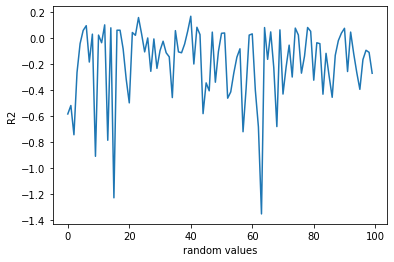

In [91]:
plt.plot(range(100),l)
plt.ylabel('R2')
plt.xlabel('random values')
plt.show()

## Random Forest Regression

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def do_test2(data,estimators,test,r):
    inp = data.drop("standard_value",axis=1).values
    out = np.array(data["standard_value"])
    train_features, test_features, train_labels, test_labels = train_test_split(
        inp, out, test_size = test ,random_state = r)
    rf = RandomForestRegressor(n_estimators = estimators)
    rf.fit(train_features, train_labels)
    return rf.score(test_features,test_labels)

In [94]:
for r in range(100):
    if do_test2(normalized_regression_data,100,0.15,r)>0.7:
        print(r,do_test2(normalized_regression_data,100,0.15,r))
        

12 0.7785454891361412
14 0.7276270393831157
24 0.6715429612555095
43 0.6073355662353501
60 0.7304312106608715
78 0.7210928718474661
89 0.6298835194442505
90 0.6982165188357319


### Plotting the R2 values against various random states

In [95]:
l1 = []
for z in range(100):
    t = do_test2(normalized_regression_data,100,0.15,z)
    l1.append(t)

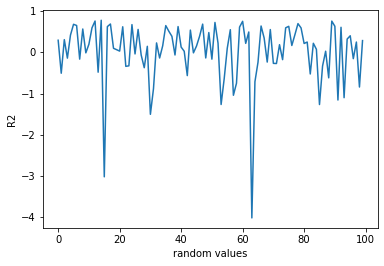

In [96]:
plt.plot(range(100),l1)
plt.ylabel('R2')
plt.xlabel('random values')
plt.show()

## Support Vector Machine Regression

In [97]:
kernels =['linear','poly','rbf','sigmoid']

In [105]:
from sklearn import svm
def do_test3(data,test,r,x):
    inp = data.drop("standard_value",axis=1).values
    out = np.array(data["standard_value"])
    rdf =svm.SVR(kernel = x,C=1)
    train_features, test_features, train_labels, test_labels = train_test_split(inp, out, test_size = test ,random_state = r)
    rdf.fit(train_features,train_labels)
    return(rdf.score(test_features,test_labels))

In [106]:
for xy in kernels:
    for r in range(100):
        if do_test3(normalized_regression_data,0.2,r,xy)>0.3:
            print(r,do_test3(normalized_regression_data,0.2,r,xy),xy)

67 0.4432869748584862 poly


### Plotting the R2 values of polynomial kernel against various random states

In [100]:
l2 = []
for z in range(100):
    t = do_test3(normalized_regression_data,0.2,z,'poly')
    l2.append(t)

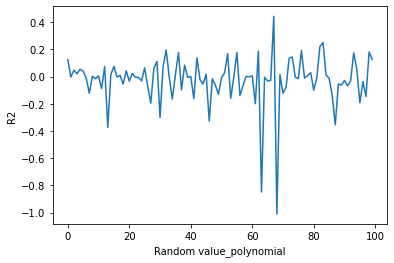

In [101]:

plt.plot(range(100),l2)
plt.ylabel('R2')
plt.xlabel('Random value_polynomial')
plt.show()

### So, with Random forest Regression showing the highest R2 value, we'll be plotting the random forest regression with random state = 14 as it has the maximum R2 value with 1000 estimators

<function matplotlib.pyplot.show(close=None, block=None)>

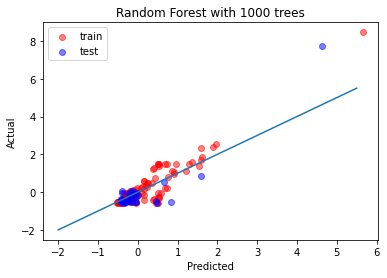

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

inp = normalized_regression_data.drop("standard_value",axis=1).values
out = np.array(normalized_regression_data["standard_value"])
train_features, test_features, train_labels, test_labels = train_test_split(inp, out, test_size = 0.15 ,random_state = 12)
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(train_features, train_labels)
x = np.linspace(-2,5.5)
y = x
plt.plot(x,y)
plt.scatter(rf.predict(train_features),train_labels,color="r",label="train",alpha = 0.5)
plt.scatter(rf.predict(test_features),test_labels,color="b",label = "test",alpha = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with 1000 trees')
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.legend(loc="best")
plt.show